In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_theme(style="darkgrid",palette=sns.color_palette("Set2"))

# load data

In [2]:
data=pd.read_csv("./Eastern_Africa-Middle_Africa-Northern_Africa-Southern_Africa-Western_Africa.csv")
data=data[['data_id','country','event_type','sub_event_type','fatalities','notes','region','latitude','longitude']]
data.head()

,data_id,country,event_type,sub_event_type,fatalities,notes,region,latitude,longitude
0,8166147,Democratic Republic of Congo,Battles,Armed clash,0,"On 1 June 2021, the ADF attacked a military ba...",Middle Africa,0.7821,29.6001
1,8166148,Sudan,Violence against civilians,Attack,5,"On 1 June 2021, three masked gunmen opened fir...",Northern Africa,15.5725,32.5364
2,8166410,Lesotho,Riots,Violent demonstration,0,"On 1 June 2021, workers pelted stones and loot...",Southern Africa,-29.3167,27.4833
3,8166411,Lesotho,Riots,Violent demonstration,0,"On 1 June 2021, workers set tires on fire and ...",Southern Africa,-28.8866,27.8991
4,8059405,Uganda,Violence against civilians,Attack,2,"On 1 June 2021, an unidentified armed group at...",Eastern Africa,0.3531,32.6000


# basic data explore

In [3]:
# number of records

print("event region count:",data.shape[0])
print("event region count:",data["region"].nunique())
print("event country count:",data["country"].nunique())
print("event type count:",data["event_type"].nunique())
print("event sub_event_type count:",data["sub_event_type"].nunique())

event region count: 33378
event region count: 5
event country count: 49
event type count: 6
event sub_event_type count: 24


In [4]:
data["event_type"].value_counts()

Protests                      11540
Battles                        7448
Violence against civilians     7141
Riots                          3928
Strategic developments         1778
Explosions/Remote violence     1543
Name: event_type, dtype: int64

In [5]:
# event distribution by event_type and region

region_event_count=data.pivot_table(index="region",
                 columns=["event_type"],
                 values="data_id",
                 aggfunc="count",
                 margins=True)

region_event_count

event_type,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians,All
region,,,,,,,
Eastern Africa,3124,631,764,628,376,2130,7653
Middle Africa,2115,94,863,635,784,2092,6583
Northern Africa,375,306,6478,679,100,423,8361
Southern Africa,8,1,1436,826,17,143,2431
Western Africa,1826,511,1999,1160,501,2353,8350
All,7448,1543,11540,3928,1778,7141,33378


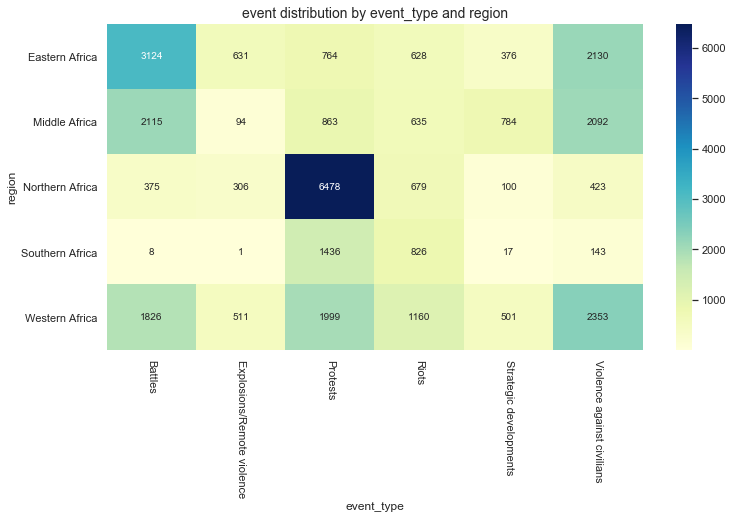

In [6]:
plt.figure(figsize=(12,6))

region_event_count2=data.pivot_table(index="region",
                 columns=["event_type"],
                 values="data_id",
                 aggfunc="count",
                 margins=False)

_=sns.heatmap(region_event_count2, 
            cmap="YlGnBu",
            annot=True,
              fmt='d')
_=plt.xticks(rotation=-90)
_=plt.title("event distribution by event_type and region",fontsize=14)

In [7]:
# fatalities distribution by event_type and region

region_fatality_count=data.pivot_table(index="region",
                 columns=["event_type"],
                 values="fatalities",
                 aggfunc="sum",
                 margins=True)
region_fatality_count

event_type,Battles,Explosions/Remote violence,Protests,Riots,Strategic developments,Violence against civilians,All
region,,,,,,,
Eastern Africa,7513,1154,86,494,40,5248,14535
Middle Africa,5160,126,17,355,10,2948,8616
Northern Africa,1244,308,23,26,0,506,2107
Southern Africa,8,2,4,168,0,90,272
Western Africa,6944,1784,47,449,10,4245,13479
All,20869,3374,177,1492,60,13037,39009


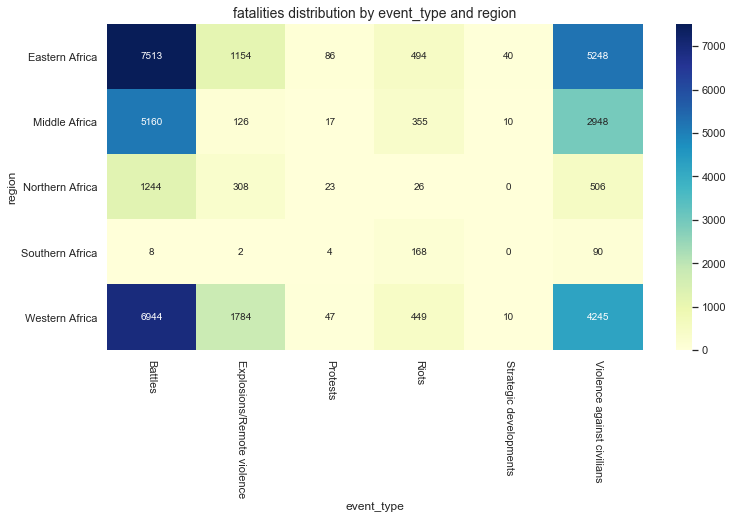

In [8]:
plt.figure(figsize=(12,6))

region_fatality_count2=data.pivot_table(index="region",
                 columns=["event_type"],
                 values="fatalities",
                 aggfunc="sum",
                 margins=False)

_=sns.heatmap(region_fatality_count2, 
            cmap="YlGnBu",
            annot=True,
              fmt='d')
_=plt.xticks(rotation=-90)
_=plt.title("fatalities distribution by event_type and region",fontsize=14)

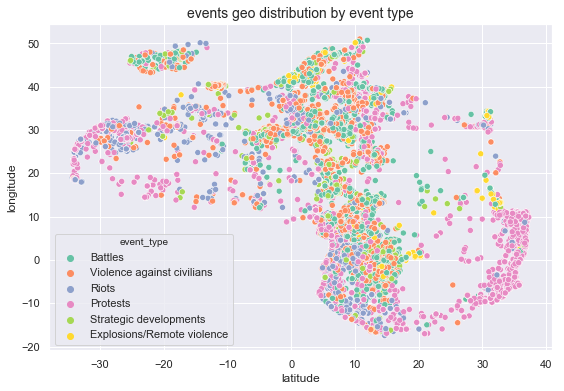

In [9]:
# event type distribution by geo

plt.figure(figsize=(9,6))
_=sns.scatterplot(x="latitude",
                  y="longitude",
                  hue="event_type",
                  data=data)
_=plt.title("events geo distribution by event type",fontsize=14)

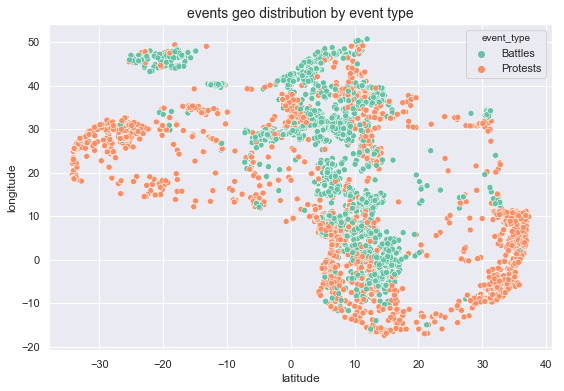

In [10]:
# if we only consider Protests and Battles type

plt.figure(figsize=(9,6))
_=sns.scatterplot(x="latitude",
                  y="longitude",
                  hue="event_type",
                  data=data[data["event_type"].isin(["Protests","Battles"])])
_=plt.title("events geo distribution by event type",fontsize=14)

# clean notes



In [11]:
import re
import string  
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize,pos_tag
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer

In [12]:
data_sub=data[["event_type","notes"]].copy()

In [13]:
# remove date info in notes

data_sub["notes"].map(lambda x: x.split(",")[0]).value_counts().head()

On 21 October 2020      143
On 19 October 2020      135
On 21 May 2021          133
On 21 September 2020    128
On 31 October 2020      125
Name: notes, dtype: int64

In [14]:


data_sub["notes"].map(lambda x: ",".join(x.split(",")[1:])).head()

0     the ADF attacked a military base in the villa...
1     three masked gunmen opened fire against civil...
2     workers pelted stones and looted shops in the...
3     workers set tires on fire and blocked roads i...
4     an unidentified armed group attacked the Mini...
Name: notes, dtype: object

In [15]:
data_sub["notes"]=data_sub["notes"].map(lambda x: ",".join(x.split(",")[1:]))

In [16]:
data_sub.head()

,event_type,notes
0,Battles,the ADF attacked a military base in the villa...
1,Violence against civilians,three masked gunmen opened fire against civil...
2,Riots,workers pelted stones and looted shops in the...
3,Riots,workers set tires on fire and blocked roads i...
4,Violence against civilians,an unidentified armed group attacked the Mini...


In [17]:
# define cleaning function 

# Remove extra space, word segmentation, part-of-speech tagging
def tokenize(sentence):
    sentence = re.sub(r'\s+', ' ', sentence)
    token_words = word_tokenize(sentence)
    token_words = pos_tag(token_words)   
    return token_words

# Normalize the word form
def stem(token_words):
    wordnet_lematizer = WordNetLemmatizer()
    words_lematizer = []
    for word, tag in token_words:
        if tag.startswith('NN'):
            word_lematizer =  wordnet_lematizer.lemmatize(word, pos='n')  # n-noun
        elif tag.startswith('VB'): 
            word_lematizer =  wordnet_lematizer.lemmatize(word, pos='v')   # v-verb
        elif tag.startswith('JJ'): 
            word_lematizer =  wordnet_lematizer.lemmatize(word, pos='a')   # adjective
        elif tag.startswith('R'): 
            word_lematizer =  wordnet_lematizer.lemmatize(word, pos='r')   # r-pronoun
        else: 
            word_lematizer =  wordnet_lematizer.lemmatize(word)
        words_lematizer.append(word_lematizer)
    return words_lematizer

# Remove stopwords 
def delete_stopwords(token_words):
    cleaned_words = [word for word in token_words if word not in stopwords.words('english')]
    return cleaned_words

# Determine whether the string is a number
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
 
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

# Remove Special words and numbers
def delete_characters(token_words):
    words_list = [word for word in token_words if word not in string.punctuation and not is_number(word)]
    return words_list

# Change to lowercase
def to_lower(token_words):
    words_lists = [x.lower() for x in token_words]
    return words_lists

# Combine the above steps and perform text preprocessing
def pre_process(text):
    token_words = tokenize(text)
    token_words = stem(token_words)
    
    token_words = delete_stopwords(token_words)
    token_words = delete_characters(token_words)
    token_words = to_lower(token_words)
    cleaned_text=" ".join(token_words)
    return cleaned_text

In [18]:
# apply clean

data_sub["notes_clean"]=data_sub["notes"].map(lambda x: pre_process(x))
data_sub.head()

,event_type,notes,notes_clean
0,Battles,the ADF attacked a military base in the villa...,adf attack military base village kokola locate...
1,Violence against civilians,three masked gunmen opened fire against civil...,three mask gunman open fire civilian gather ar...
2,Riots,workers pelted stones and looted shops in the...,worker pelt stone looted shop thetsane industr...
3,Riots,workers set tires on fire and blocked roads i...,worker set tire fire block road maputsoe lerib...
4,Violence against civilians,an unidentified armed group attacked the Mini...,unidentified arm group attack minister transpo...


# show keywords distribution by event_type

In [19]:
# generate notes text by event_type

event_type_notes=data_sub.groupby("event_type")["notes_clean"].apply(list).to_dict()
print(event_type_notes.keys())

dict_keys(['Battles', 'Explosions/Remote violence', 'Protests', 'Riots', 'Strategic developments', 'Violence against civilians'])


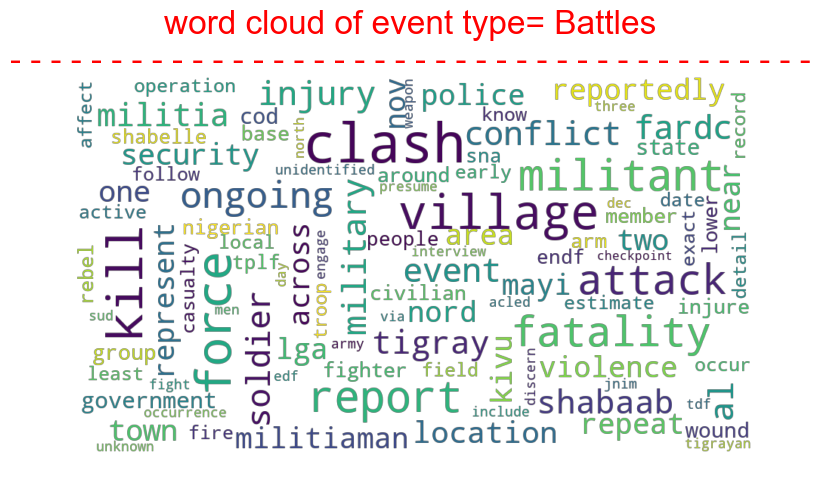

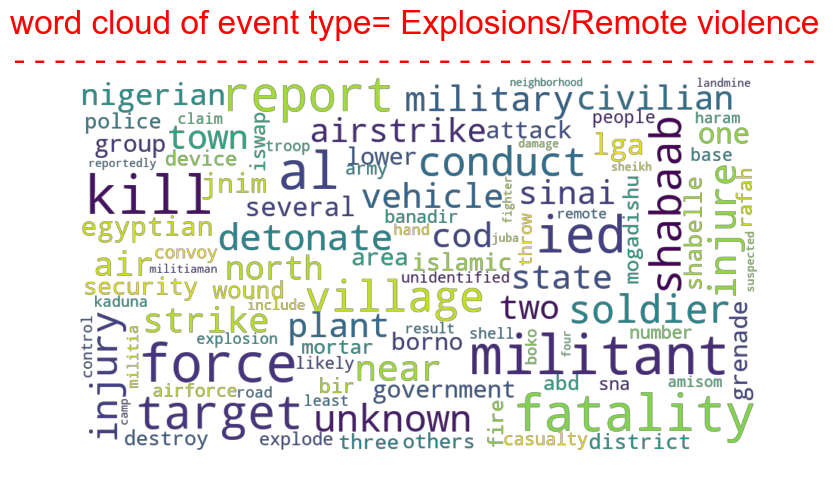

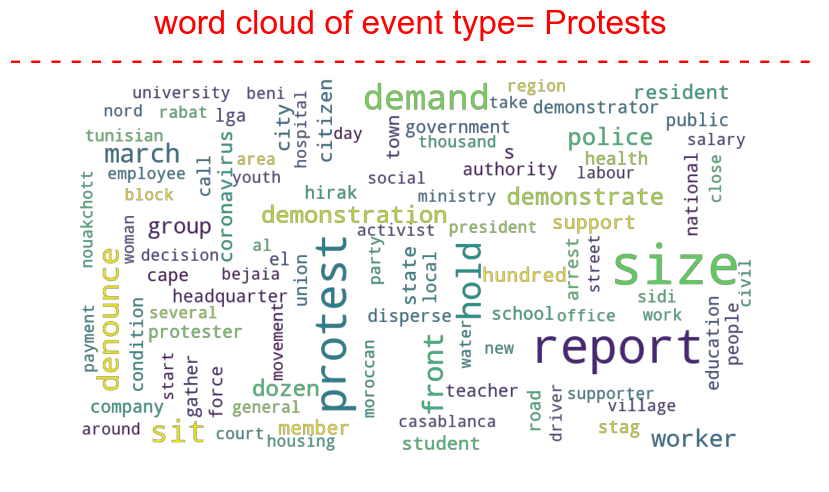

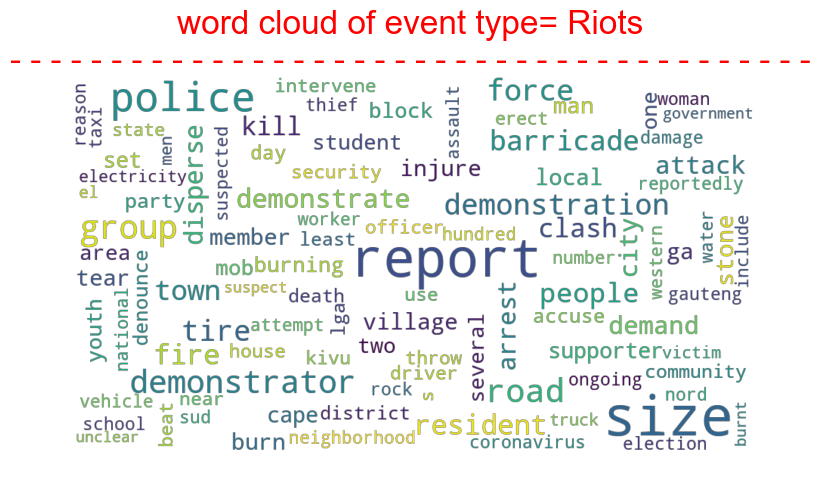

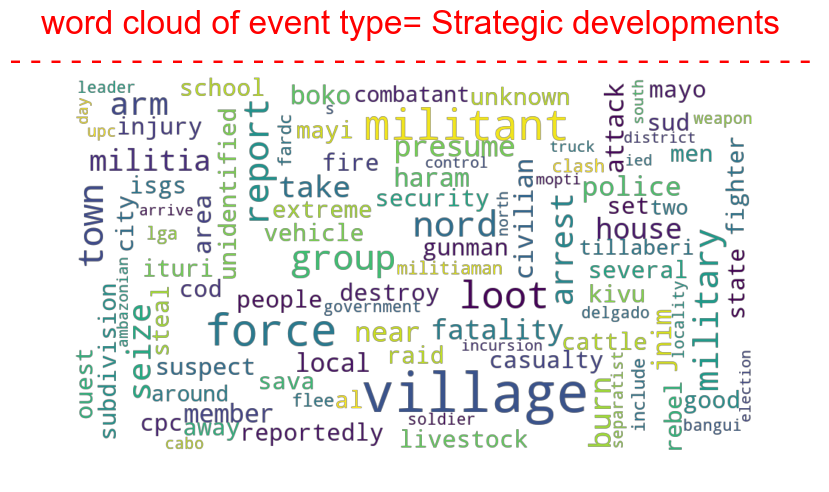

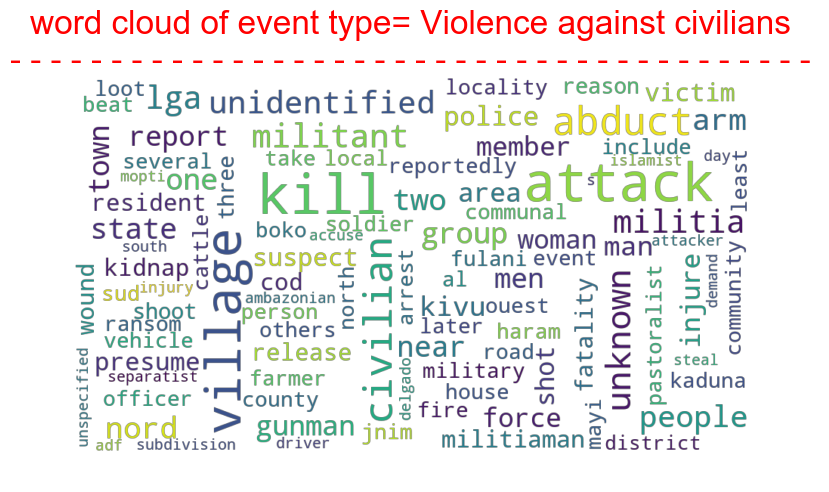

In [20]:

for k in event_type_notes.keys():
    
    text=" ".join(event_type_notes[k])

    wc = WordCloud(width=900, height=500, 
                   mode='RGBA', background_color=None,
                   min_font_size=12,max_font_size=72,
                   collocations=False,prefer_horizontal=0.8,
                   max_words=100).generate(text)

    # show wordcloud img
    plt.figure(figsize=(9,5),dpi=100)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("word cloud of event type= {} \n{}".format(k,'- '*40),fontsize=24,color='red')
    plt.show()
    print()